In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

from math   import sqrt
from typing import List

In [2]:
datafiles = ["home/miryam/G4Basic/data_50keV.csv"  ,
             "home/miryam/G4Basic/data_500keV.csv" ,
             "home/miryam/G4Basic/data_1000keV.csv",
             "home/miryam/G4Basic/data_1500keV.csv",
             "home/miryam/G4Basic/data_2000keV.csv",
             "home/miryam/G4Basic/data_2500keV.csv"]

In [3]:
dfs = [pd.read_csv(f, header=0) for f in datafiles]
df_50   = dfs[0]
df_500  = dfs[1]
df_1000 = dfs[2]
df_1500 = dfs[3]
df_2000 = dfs[4]
df_2500 = dfs[5]

FileNotFoundError: File b'home/miryam/G4Basic/data_50keV.csv' does not exist

In [6]:
dist_50 = pd.DataFrame({'xdist': df_50.groupby('event_number')['x'].max() - df_50.groupby('event_number')['x'].min(), 
                        'ydist': df_50.groupby('event_number')['y'].max() - df_50.groupby('event_number')['y'].min(), 
                        'zdist': df_50.groupby('event_number')['z'].max() - df_50.groupby('event_number')['z'].min()})

In [ ]:
dist_500 = pd.DataFrame({'xdist': df_500.groupby('event_number')['x'].max() - df_500.groupby('event_number')['x'].min(), 
                         'ydist': df_500.groupby('event_number')['y'].max() - df_500.groupby('event_number')['y'].min(), 
                         'zdist': df_500.groupby('event_number')['z'].max() - df_500.groupby('event_number')['z'].min()})

In [ ]:
dist_1000 = pd.DataFrame({'xdist': df_1000.groupby('event_number')['x'].max() - df_1000.groupby('event_number')['x'].min(), 
                          'ydist': df_1000.groupby('event_number')['y'].max() - df_1000.groupby('event_number')['y'].min(), 
                          'zdist': df_1000.groupby('event_number')['z'].max() - df_1000.groupby('event_number')['z'].min()})

In [ ]:
dist_1500 = pd.DataFrame({'xdist': df_1500.groupby('event_number')['x'].max() - df_1500.groupby('event_number')['x'].min(), 
                          'ydist': df_1500.groupby('event_number')['y'].max() - df_1500.groupby('event_number')['y'].min(), 
                          'zdist': df_1500.groupby('event_number')['z'].max() - df_1500.groupby('event_number')['z'].min()})

In [ ]:
dist_2000 = pd.DataFrame({'xdist': df_2000.groupby('event_number')['x'].max() - df_2000.groupby('event_number')['x'].min(), 
                          'ydist': df_2000.groupby('event_number')['y'].max() - df_2000.groupby('event_number')['y'].min(), 
                          'zdist': df_2000.groupby('event_number')['z'].max() - df_2000.groupby('event_number')['z'].min()})

In [ ]:
dist_2500 = pd.DataFrame({'xdist': df_2500.groupby('event_number')['x'].max() - df_2500.groupby('event_number')['x'].min(), 
                          'ydist': df_2500.groupby('event_number')['y'].max() - df_2500.groupby('event_number')['y'].min(), 
                          'zdist': df_2500.groupby('event_number')['z'].max() - df_2500.groupby('event_number')['z'].min()})

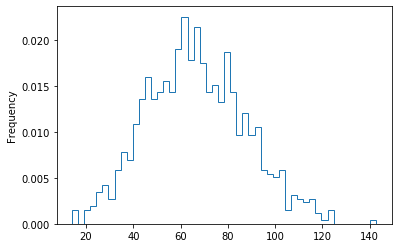

In [7]:
def diagonal(row):
    return sqrt(row['xdist']**2 + row['ydist']**2 + row['zdist']**2)

In [ ]:
dist_50['diag'] = dist_50.apply(diagonal, axis=1)
dist_500['diag'] = dist_500.apply(diagonal, axis=1)
dist_1000['diag'] = dist_1000.apply(diagonal, axis=1)
dist_1500['diag'] = dist_1500.apply(diagonal, axis=1)
dist_2000['diag'] = dist_2000.apply(diagonal, axis=1)
dist_2500['diag'] = dist_2500.apply(diagonal, axis=1)

In [ ]:
plt.hist(dist_50  .diag, bins=50, histtype="step", density=True, label="50keV"  )
plt.hist(dist_500 .diag, bins=50, histtype="step", density=True, label="500keV" )
plt.hist(dist_1000.diag, bins=50, histtype="step", density=True, label="1000keV")
plt.hist(dist_1500.diag, bins=50, histtype="step", density=True, label="1500keV")
plt.hist(dist_2000.diag, bins=50, histtype="step", density=True, label="2000keV")
plt.hist(dist_2500.diag, bins=50, histtype="step", density=True, label="2500keV")
plt.legend()
plt.xlabel("Diagonal (mm)")
plt.ylabel("Frequency")

In [8]:
df.head()

,event_number,step_number,X,Y,Z,UX,UY,UZ,step_length,E_kin,E_dep,track_length
0,0,0,0.000,0.000,0.000,-0.933,0.297,0.203,0.000,2500.000,0.000,0.000
1,0,1,-0.027,0.009,0.006,-0.936,0.292,0.198,0.029,2499.640,0.360,0.029
2,0,2,-0.439,0.137,0.093,-0.893,-0.129,0.431,0.442,1497.843,1.408,0.471
3,0,3,-14.354,-1.875,6.806,0.353,0.797,-0.490,28.668,1234.405,263.438,29.139
4,0,4,-10.117,7.679,0.929,-0.769,-0.000,-0.640,22.817,1055.234,179.171,51.956


In [13]:
@np.vectorize
def cosine_direction(ux, uy, uz, u0x, u0y, u0z):
    u  = np.array([ux,uy,uz])
    u0 = np.array([u0x,u0y,u0z])
    cosine = np.dot(u, u0)
    return cosine
    
df['cosine'] = df.groupby('event_number').apply(lambda x : cosine_direction(x['UX'], x['UY'], x['UZ'], x.iloc[0]['UX'], x.iloc[0]['UY'], x.iloc[0]['UZ']))

In [14]:
df.head()

,event_number,step_number,X,Y,Z,UX,UY,UZ,step_length,E_kin,E_dep,track_length,cosine
0,0,0,0.000,0.000,0.000,-0.933,0.297,0.203,0.000,2500.000,0.000,0.000,"[0.9999069999999999, 1.000206, 0.8823489999999..."
1,0,1,-0.027,0.009,0.006,-0.936,0.292,0.198,0.029,2499.640,0.360,0.029,"[1.000782, -0.4092519999999999, 0.225130999999..."
2,0,2,-0.439,0.137,0.093,-0.893,-0.129,0.431,0.442,1497.843,1.408,0.471,"[0.9996460000000001, 0.24442999999999998, 0.18..."
3,0,3,-14.354,-1.875,6.806,0.353,0.797,-0.490,28.668,1234.405,263.438,29.139,"[0.999934, 0.789094, 0.42818199999999995, 0.45..."
4,0,4,-10.117,7.679,0.929,-0.769,-0.000,-0.640,22.817,1055.234,179.171,51.956,"[1.0001380000000002, 0.9536380000000001, -0.63..."
